# A basic neural network implementation

* A basic forward and backward pass
* Manually implemented partial derivative
* Single output layer

In [1]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
np.random.seed(0)

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X / np.amax(X, axis=0) # maximum of X array
y = y / 100 # max test score is 100

In [4]:
X

array([[0.66666667, 1.        ],
       [0.33333333, 0.55555556],
       [1.        , 0.66666667]])

In [5]:
y

array([[0.92],
       [0.86],
       [0.89]])

In [6]:
class NeuralNetwork(object):

    def __init__(self):
        self.input_dim = 2
        self.output_dim = 1
        self.hidden_dim = 3
    
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)

    def forward(self, X):
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        return self.sigmoid(self.z3) # final activation function
    
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

In [7]:
nn = NeuralNetwork()

In [8]:
nn.forward(X)

array([[0.67727117],
       [0.65870127],
       [0.67437581]])

In [9]:
print('predicted', nn.forward(X))
print('actual', y)

predicted [[0.67727117]
 [0.65870127]
 [0.67437581]]
actual [[0.92]
 [0.86]
 [0.89]]


Backpropagation uses a loss function to calculate how far the network was from the target output. 

To figure out which direction to alter our weights, we need to find the **rate of change of our loss with respect to our weights**. In other words, we need to use the **derivative of the loss function** to understand how the weights affect the input.

Steps:

* calculate error between actual and predicted value
* use the derivative of the activation with respect to the weights to calculate the contribution of each weight to the error
* dot product the delta with the weights
* repeat for the next layer

![](https://s0.wp.com/latex.php?latex=%5CLarge%7B%5Cbegin%7Barray%7D%7Brcl%7D+g%27_%7B%5Ctext%7Blogistic%7D%7D%28z%29+%26%3D%26+%5Cfrac%7B%5Cpartial%7D%7B%5Cpartial+z%7D+%5Cleft+%28+%5Cfrac%7B1%7D%7B1+%2B+e%5E%7B-z%7D%7D%5Cright+%29+%5C%5C++%26%3D%26+%5Cfrac%7Be%5E%7B-z%7D%7D%7B%281+%2B+e%5E%7B-z%7D%29%5E2%7D+%5Ctext%7B%28chain+rule%29%7D+%5C%5C++%26%3D%26+%5Cfrac%7B1+%2B+e%5E%7B-z%7D+-+1%7D%7B%281+%2B+e%5E%7B-z%7D%29%5E2%7D+%5C%5C++%26%3D%26+%5Cfrac%7B1+%2B+e%5E%7B-z%7D%7D%7B%281+%2B+e%5E%7B-z%7D%29%5E2%7D+-+%5Cleft+%28+%5Cfrac%7B1%7D%7B1%2Be%5E%7B-z%7D%7D+%5Cright+%29%5E2+%5C%5C++%26%3D%26+%5Cfrac%7B1%7D%7B%281+%2B+e%5E%7B-z%7D%29%7D+-+%5Cleft+%28+%5Cfrac%7B1%7D%7B1%2Be%5E%7B-z%7D%7D+%5Cright+%29%5E2+%5C%5C++%26%3D%26+g_%7B%5Ctext%7Blogistic%7D%7D%28z%29-+g_%7B%5Ctext%7Blogistic%7D%7D%28z%29%5E2+%5C%5C++%26%3D%26+g_%7B%5Ctext%7Blogistic%7D%7D%28z%29%281+-+g_%7B%5Ctext%7Blogistic%7D%7D%28z%29%29+%5Cend%7Barray%7D%7D&bg=ffffff&fg=4e4e4e&s=0)

In [10]:
class NeuralNetwork(object):

    def __init__(self):
        self.input_dim = 2
        self.output_dim = 1
        self.hidden_dim = 3
    
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)

    def forward(self, X):
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        return self.sigmoid(self.z3) # final activation function
    
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoid_prime(self, s):
        """ Derivative of sigmoid. """
        return s * (1 - s)

    def backward(self, X, y, o):
        """"""
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoid_prime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error * self.sigmoid_prime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        predicted = self.forward(X)
        self.backward(X, y, predicted)


In [11]:
nn = NeuralNetwork()
history = [] # Keep track of the loss

for i in range(100): # trains the NN
    loss = np.mean(np.square(y - nn.forward(X)))
    history.append(loss)
    nn.train(X, y)

In [12]:
len(history)

100

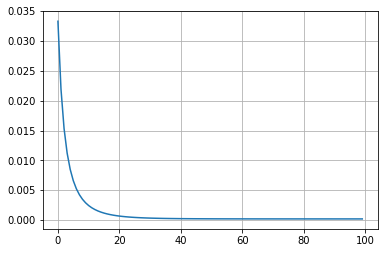

In [13]:
plt.plot(history)
plt.grid(True)

# Adjusting the network for the digits data set

The digits data set contains 64 inputs. We can use a hidden layer size of 100. The output can be represented as a single value, that indicates the digit or as ten outputs.

In [14]:
class NeuralNetwork(object):

    def __init__(self):
        self.input_dim = 64
        self.output_dim = 1
        self.hidden_dim = 100
    
        self.W1 = np.random.randn(self.input_dim, self.hidden_dim)
        self.W2 = np.random.randn(self.hidden_dim, self.output_dim)

    def forward(self, X):
        self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
        return self.sigmoid(self.z3) # final activation function
    
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoid_prime(self, s):
        """ Derivative of sigmoid. """
        return s * (1 - s)

    def backward(self, X, y, o):
        """"""
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoid_prime(o) # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error * self.sigmoid_prime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

    def train(self, X, y):
        predicted = self.forward(X)
        self.backward(X, y, predicted)


In [16]:
from sklearn import datasets

In [17]:
digits = datasets.load_digits()

In [20]:
digits.data.shape

(1797, 64)

Let's feed a single example through a forward pass.

In [21]:
first = digits.data[0]

In [23]:
first.shape

(64,)

In [24]:
nn = NeuralNetwork()

In [25]:
nn.input_dim

64

In [26]:
nn.forward(first)

array([0.00075567])

In [28]:
nn.forward(digits.data).shape

(1797, 1)

In [29]:
X = digits.data

In [30]:
y = digits.target

In [34]:
y = y[:, None]

In [36]:
y.shape

(1797, 1)

In [37]:
nn = NeuralNetwork()
history = [] # Keep track of the loss

for i in range(100): # trains the NN
    loss = np.mean(np.square(y - nn.forward(X)))
    history.append(loss)
    nn.train(X, y)

/Users/tir/.virtualenvs/mlcourse/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


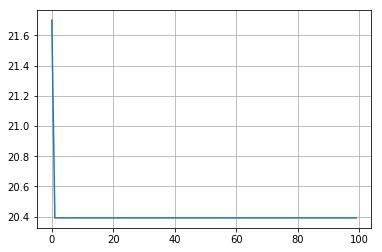

In [38]:
plt.plot(history)
plt.grid(True)

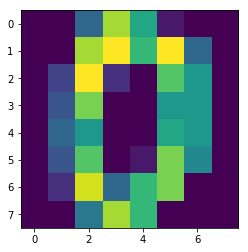

In [40]:
plt.imshow(X[0].reshape(8, 8))

In [41]:
y[0]

array([0])

In [44]:
nn.forward(X[1])

/Users/tir/.virtualenvs/mlcourse/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


array([1.])

We get an underflow because we did not normlize our data.

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [48]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
X_scaled = scaler.transform(X)

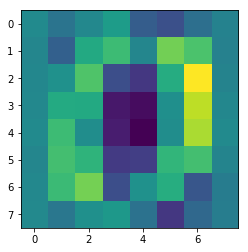

In [51]:
plt.imshow(X_scaled[0].reshape(8, 8))

In [59]:
nn = NeuralNetwork()
history = [] # Keep track of the loss

for i in range(100): # trains the NN
    loss = np.mean(np.square(y - nn.forward(X_scaled)))
    history.append(loss)
    nn.train(X_scaled, y)

/Users/tir/.virtualenvs/mlcourse/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


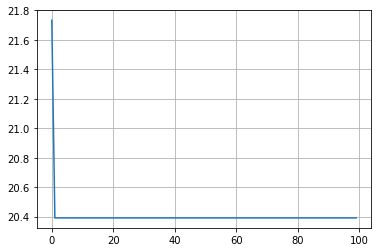

In [60]:
plt.plot(history)
plt.grid(True)